Assignment 2                                                                             

Implementing a Deep Learning Model for Binary Classification task of predicting Negative and Positive Reviews using the IMDB dataset.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import imdb
from keras import metrics
import matplotlib.pyplot as plt
%matplotlib inline

Epoch 1/5
40/40 [==============================] - 4s 48ms/step - loss: 0.6894 - accuracy: 0.6342 - val_loss: 0.6815 - val_accuracy: 0.6930
Epoch 2/5
40/40 [==============================] - 2s 38ms/step - loss: 0.6665 - accuracy: 0.7329 - val_loss: 0.6434 - val_accuracy: 0.7478
Epoch 3/5
40/40 [==============================] - 2s 40ms/step - loss: 0.6108 - accuracy: 0.7879 - val_loss: 0.5729 - val_accuracy: 0.7932
Epoch 4/5
40/40 [==============================] - 2s 39ms/step - loss: 0.5276 - accuracy: 0.8290 - val_loss: 0.4906 - val_accuracy: 0.8270
Epoch 5/5
782/782 [==============================] - 3s 3ms/step
              precision    recall  f1-score   support

           0       0.85      0.84      0.84     12500
           1       0.84      0.85      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



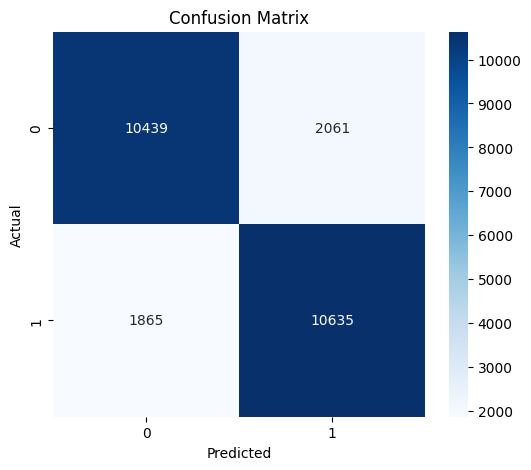

Test Accuracy: 0.8430


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, classification_report

# 1. Load & pad data
vocab_size = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=max_len)
x_test  = pad_sequences(x_test,  maxlen=max_len)

# 2. Build model
model = Sequential([
    Embedding(vocab_size, 32, input_length=max_len),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Train
model.fit(x_train, y_train,
          epochs=5, batch_size=512,
          validation_split=0.2, verbose=1)

# 4. Predict probabilities & convert to binary labels
pred_prob = model.predict(x_test)                # floats between 0 and 1
pred_label = (pred_prob > 0.5).astype(int).reshape(-1)  # threshold at 0.5

# 5. Confusion matrix & classification report
cm = confusion_matrix(y_test, pred_label)
print(classification_report(y_test, pred_label))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 6. Final evaluation
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")


In [2]:
(train_data, train_label),(test_data, test_label) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 4s 0us/step


In [3]:
import numpy as np

def vectorize_sequences(sequences, dimensions = 10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [4]:
xtrain = vectorize_sequences(train_data)
xtest = vectorize_sequences(test_data)

In [5]:
ytrain = np.asarray(train_label).astype('float32')
ytest = np.asarray(test_label).astype('float32')

In [6]:
xtrain[0], xtrain.shape

(array([0., 1., 1., ..., 0., 0., 0.]), (25000, 10000))

In [7]:
model = Sequential()
model.add(Dense(16, input_shape=(10000, ), activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [8]:
model.compile(optimizer='adam', loss="mse", metrics=['mae'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [10]:
x_val = xtrain[:10000]
partial_xtrain = xtrain[10000:]

y_val = ytrain[:10000]
partial_ytrain = ytrain[10000:]

history = model.fit(xtrain, ytrain, validation_split = 0.3, epochs=20, verbose=1, batch_size=512)

Epoch 1/20
35/35 [==============================] - 14s 288ms/step - loss: 0.1970 - mae: 0.4306 - val_loss: 0.1315 - val_mae: 0.3271
Epoch 2/20
35/35 [==============================] - 1s 32ms/step - loss: 0.0958 - mae: 0.2533 - val_loss: 0.0887 - val_mae: 0.2202
Epoch 3/20
35/35 [==============================] - 1s 34ms/step - loss: 0.0620 - mae: 0.1716 - val_loss: 0.0814 - val_mae: 0.1856
Epoch 4/20
35/35 [==============================] - 1s 32ms/step - loss: 0.0462 - mae: 0.1333 - val_loss: 0.0812 - val_mae: 0.1690
Epoch 5/20
35/35 [==============================] - 1s 29ms/step - loss: 0.0362 - mae: 0.1079 - val_loss: 0.0812 - val_mae: 0.1581
Epoch 6/20
35/35 [==============================] - 1s 29ms/step - loss: 0.0274 - mae: 0.0872 - val_loss: 0.0840 - val_mae: 0.1527
Epoch 7/20
35/35 [==============================] - 1s 30ms/step - loss: 0.0208 - mae: 0.0712 - val_loss: 0.0864 - val_mae: 0.1488
Epoch 8/20
35/35 [==============================] - 1s 29ms/step - loss: 0.0159 -

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

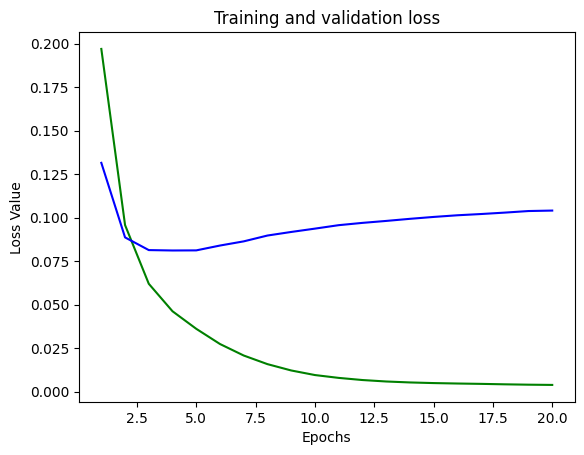

In [12]:
loss_value = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_value)+1)
plt.plot(epochs, loss_value, 'g', label = 'training loss')
plt.plot(epochs, val_loss_values, 'b', label='validation loss')

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")

plt.show()

In [13]:
np.set_printoptions(suppress=True)
result = model.predict(xtest)

782/782 [==============================] - 5s 5ms/step


In [14]:
print(result)

[[0.1208794 ]
 [0.99980146]
 [0.03449341]
 ...
 [0.14650147]
 [0.00104676]
 [0.1503892 ]]


In [15]:
# IMDB Reviews Classification using Deep Neural Network
# IMDB Reviews Classification using Deep Neural Network

from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 1: Dataset load karo (top 10000 common words)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Step 2: Sab sequences ko same length me pad karna
X_train = pad_sequences(X_train, maxlen=200)
X_test = pad_sequences(X_test, maxlen=200)

# Step 3: Neural Network banana
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=200))  # Word Embedding Layer
model.add(GlobalAveragePooling1D())  # Average kar deta hai
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output: 0 or 1

# Step 4: Compile and train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Step 5: Test set pe evaluate karna
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")


# Step 1: Dataset load karo (top 10000 common words)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Step 2: Sab sequences ko same length me pad karna
X_train = pad_sequences(X_train, maxlen=200)
X_test = pad_sequences(X_test, maxlen=200)

# Step 3: Neural Network banana
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=200))  # Word Embedding Layer
model.add(GlobalAveragePooling1D())  # Average kar deta hai
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output: 0 or 1

# Step 4: Compile and train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Step 5: Test set pe evaluate karna
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")


Epoch 1/5
313/313 [==============================] - 8s 17ms/step - loss: 0.5333 - accuracy: 0.7595 - val_loss: 0.3361 - val_accuracy: 0.8670
Epoch 2/5
313/313 [==============================] - 5s 16ms/step - loss: 0.2648 - accuracy: 0.8962 - val_loss: 0.2874 - val_accuracy: 0.8852
Epoch 3/5
313/313 [==============================] - 5s 15ms/step - loss: 0.1988 - accuracy: 0.9220 - val_loss: 0.2875 - val_accuracy: 0.8828
Epoch 4/5
313/313 [==============================] - 5s 16ms/step - loss: 0.1564 - accuracy: 0.9433 - val_loss: 0.3045 - val_accuracy: 0.8822
Epoch 5/5
782/782 [==============================] - 3s 4ms/step - loss: 0.3614 - accuracy: 0.8653
Test Accuracy: 0.87
Epoch 1/5
313/313 [==============================] - 8s 20ms/step - loss: 0.5333 - accuracy: 0.7587 - val_loss: 0.3397 - val_accuracy: 0.8648
Epoch 2/5
313/313 [==============================] - 6s 18ms/step - loss: 0.2655 - accuracy: 0.8952 - val_loss: 0.2867 - val_accuracy: 0.8838
Epoch 3/5
313/313 [==========

Epoch 1/5
313/313 [==============================] - 8s 18ms/step - loss: 0.5251 - accuracy: 0.7642 - val_loss: 0.3323 - val_accuracy: 0.8702
Epoch 2/5
313/313 [==============================] - 6s 18ms/step - loss: 0.2600 - accuracy: 0.8971 - val_loss: 0.2906 - val_accuracy: 0.8846
Epoch 3/5
313/313 [==============================] - 5s 16ms/step - loss: 0.1936 - accuracy: 0.9256 - val_loss: 0.2898 - val_accuracy: 0.8844
Epoch 4/5
313/313 [==============================] - 6s 18ms/step - loss: 0.1527 - accuracy: 0.9446 - val_loss: 0.3090 - val_accuracy: 0.8816
Epoch 5/5
782/782 [==============================] - 3s 4ms/step


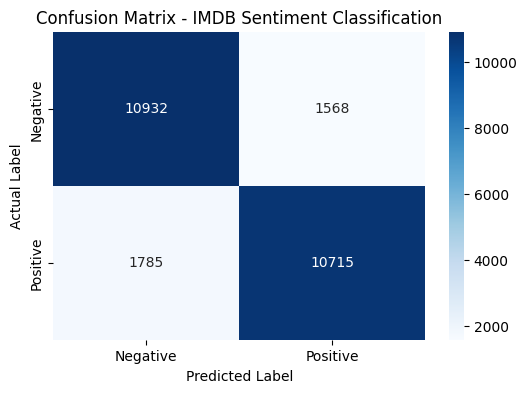

              precision    recall  f1-score   support

    Negative       0.86      0.87      0.87     12500
    Positive       0.87      0.86      0.86     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



In [16]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load IMDB Dataset (top 10,000 words)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Step 2: Pad all sequences to same length
X_train = pad_sequences(X_train, maxlen=200)
X_test = pad_sequences(X_test, maxlen=200)

# Step 3: Build DNN model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=200))
model.add(GlobalAveragePooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 0 = negative, 1 = positive

# Step 4: Compile and train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Step 5: Predict and round values
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Threshold at 0.5

# Step 6: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Negative', 'Positive']

# Step 7: Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - IMDB Sentiment Classification")
plt.show()

# Step 8: Optional - classification report
print(classification_report(y_test, y_pred, target_names=labels))


Epoch 1/5
313/313 [==============================] - 8s 18ms/step - loss: 0.5224 - accuracy: 0.7695 - val_loss: 0.3386 - val_accuracy: 0.8612
Epoch 2/5
313/313 [==============================] - 5s 16ms/step - loss: 0.2640 - accuracy: 0.8966 - val_loss: 0.2922 - val_accuracy: 0.8824
Epoch 3/5
313/313 [==============================] - 5s 16ms/step - loss: 0.1983 - accuracy: 0.9242 - val_loss: 0.2965 - val_accuracy: 0.8824
Epoch 4/5
313/313 [==============================] - 5s 16ms/step - loss: 0.1581 - accuracy: 0.9420 - val_loss: 0.3089 - val_accuracy: 0.8788
Epoch 5/5
782/782 [==============================] - 3s 3ms/step


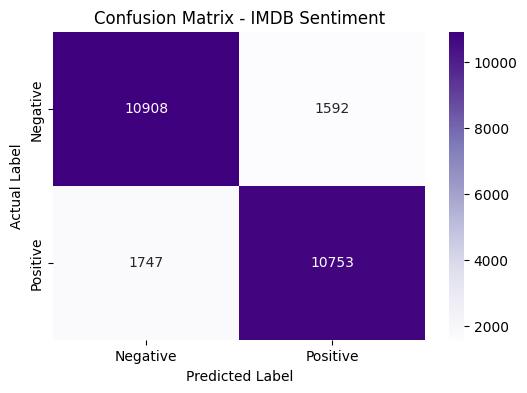

              precision    recall  f1-score   support

    Negative       0.86      0.87      0.87     12500
    Positive       0.87      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/imdb_word_index.json: None -- [Errno 2] No such file or directory

In [17]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load dataset (top 10,000 words)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Step 2: Pad sequences to same length
X_train = pad_sequences(X_train, maxlen=200)
X_test = pad_sequences(X_test, maxlen=200)

# Step 3: Build the model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=200))
model.add(GlobalAveragePooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Step 4: Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Step 5: Predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Step 6: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Negative', 'Positive']

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Purples')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - IMDB Sentiment")
plt.show()

print(classification_report(y_test, y_pred, target_names=labels))

# Step 7: Decode reviews (word index to text)
word_index = imdb.get_word_index()
reverse_word_index = {value+3: key for key, value in word_index.items()}  # shift by 3 for special tokens
reverse_word_index[0] = '[PAD]'
reverse_word_index[1] = '[START]'
reverse_word_index[2] = '[UNK]'
reverse_word_index[3] = '[UNUSED]'

# Function to decode a review
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i, '?') for i in encoded_review])

# Step 8: Show a few actual reviews and predictions
for i in range(5):
    print(f"\nReview #{i+1} (Actual: {labels[y_test[i]]})")
    print(decode_review(X_test[i]))
    pred_label = labels[y_pred[i]]
    print(f"Predicted: {pred_label}")

# Step 9: Predict on custom text review (optional)
from tensorflow.keras.preprocessing.text import text_to_word_sequence

def predict_custom_review(text):
    # Convert text to sequence of word indexes
    words = text_to_word_sequence(text)
    indices = [word_index.get(w, 2) for w in words]  # 2 is UNK
    padded = pad_sequences([indices], maxlen=200)
    prob = model.predict(padded)[0][0]
    print(f"\nYour Review: \"{text}\"")
    print("Predicted Sentiment:", "Positive 😀" if prob > 0.5 else "Negative 😠")
    print(f"Confidence: {prob:.2f}")

# Example:
predict_custom_review("This movie was absolutely amazing, I loved the acting and story!")
predict_custom_review("Worst movie ever. Waste of time and money.")
